<a href="https://colab.research.google.com/github/asma-gud/Image-Filtering-and-Edge-Detection/blob/main/TP2_BTI.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!git clone https://github.com/DSARU-CERIST/BTI.git

fatal: destination path 'BTI' already exists and is not an empty directory.


# **Filtres discrets et détection de contours**

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

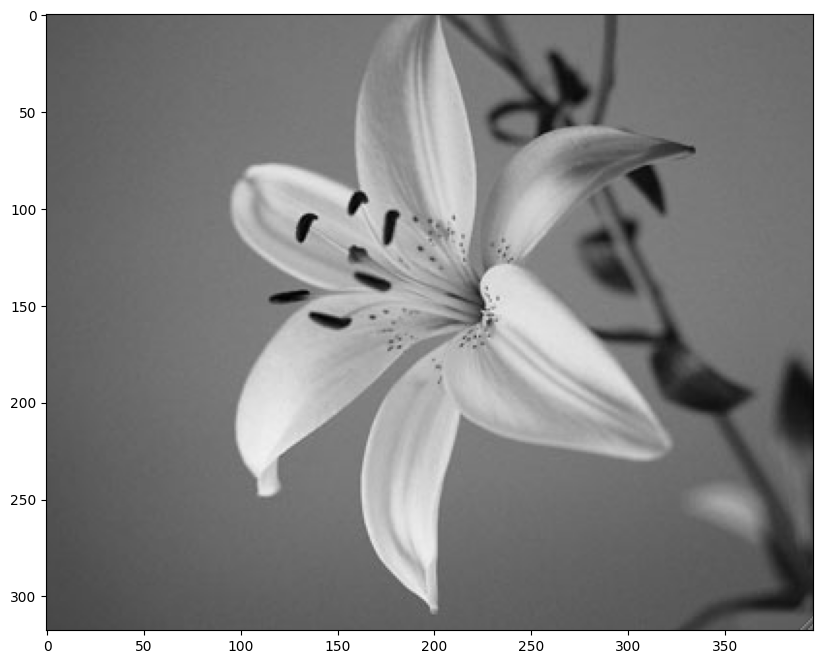

In [ ]:
image = cv2.imread('/content/BTI/figs/flower.png')
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
fig, ax = plt.subplots(1, figsize=(12,8))
plt.imshow(image)

# **Blur Box Kernel**

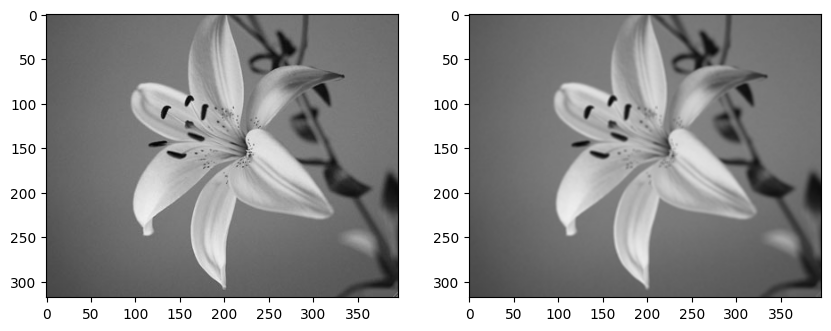

In [ ]:
kernel = np.ones((3, 3), np.float32) / 9
img = cv2.filter2D(image, -1, kernel)
fig, ax = plt.subplots(1,2,figsize=(10,6))
ax[0].imshow(image)
ax[1].imshow(img)

# **Sharpening Kernel**


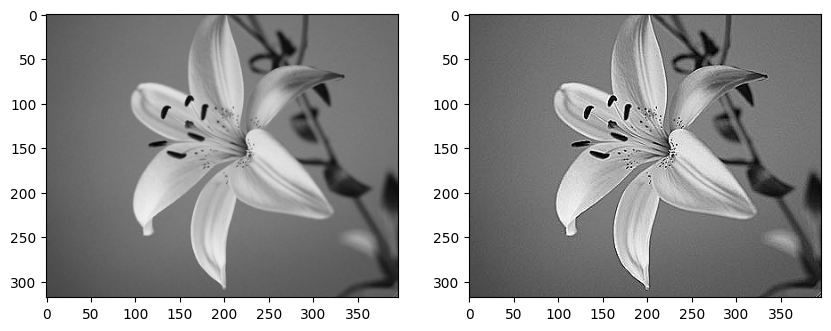

In [ ]:
kernel = np.array([[0, -1, 0],
                   [-1, 5, -1],
                   [0, -1, 0]])
img = cv2.filter2D(image, -1, kernel)
fig, ax = plt.subplots(1,2,figsize=(10,6))
ax[0].imshow(image)
ax[1].imshow(img)


# **Emboss Kernel (3D)**

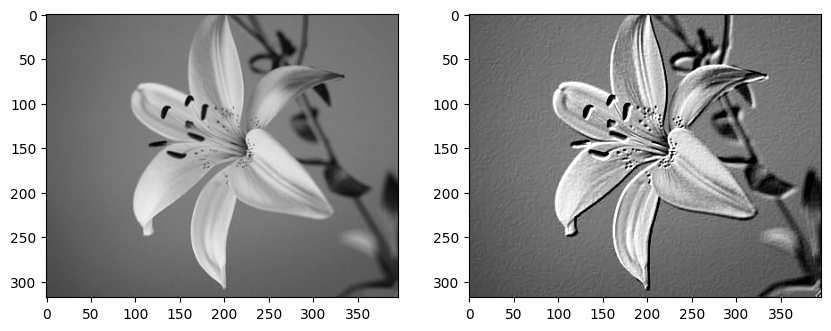

In [ ]:
kernel = np.array([[-2, -1, 0],
                   [-1, 1, 1],
                   [0, 1, 2]])
img = cv2.filter2D(image, -1, kernel)
fig, ax = plt.subplots(1,2,figsize=(10,6))
ax[0].imshow(image)
ax[1].imshow(img)


# **Mean filter**

In [ ]:
def create_mean_filter(size):
    return np.ones((size, size), dtype=np.float32) / (size * size)

In [ ]:
def plot_images(images, titles,ncols=3, spacing=0.3):
    num_images = len(images)
    nrows = (num_images - 1) // ncols + 1
    plt.figure(figsize=(4 * ncols, 4 * nrows))
    plt.subplots_adjust(wspace=spacing, hspace=spacing)  # Adjusting the horizontal and vertical spacing between subplots
    for i in range(num_images):
        plt.subplot(nrows, ncols, i + 1)
        plt.imshow(images[i], cmap='gray')
        plt.title(titles[i], fontsize=10)  # Adjusting the font size of titles
        plt.axis('off')
    plt.show()

In [ ]:
def filter_analysis(image, filter_func, filter_sizes, dilations, strides, ncols=3, spacing=0.2):

    num_filters = len(filter_sizes)
    num_dilations = len(dilations)
    num_strides = len(strides)
    num_plots = num_filters + num_dilations + num_strides


    result_images = []
    titles = []

    # convolution  (différents filtres moyenneurs)
    for size in filter_sizes:
        kernel = filter_func(size)
        result = apply_convolution(image, kernel)
        result_images.append(result)
        titles.append(f'Mean Filter ({size}x{size})')

    # convolution (différentes dilatations)
    for dilation in dilations:
        kernel = np.array([[0, 1, 0], [1, 1, 1], [0, 1, 0]], dtype=np.uint8)
        result = cv2.dilate(image, kernel, iterations=dilation)
        result_images.append(result)
        titles.append(f'Dilation (iterations={dilation})')

    # convolution (différents strides)
    for stride in strides:
        result = cv2.resize(image, None, fx=1/stride, fy=1/stride, interpolation=cv2.INTER_LINEAR)
        result_images.append(result)
        titles.append(f'Stride (factor={stride})')


    plot_images(result_images, titles, ncols=ncols, spacing=spacing)  # Passing the ncols parameter only



In [ ]:
def apply_convolution(image, kernel):
    if len(image.shape) == 3:  # Color image
        return apply_convolution_color(image, kernel)
    elif len(image.shape) == 2:  # Grayscale image
        return cv2.filter2D(image, -1, kernel)
    else:
        raise ValueError("Unsupported image format")

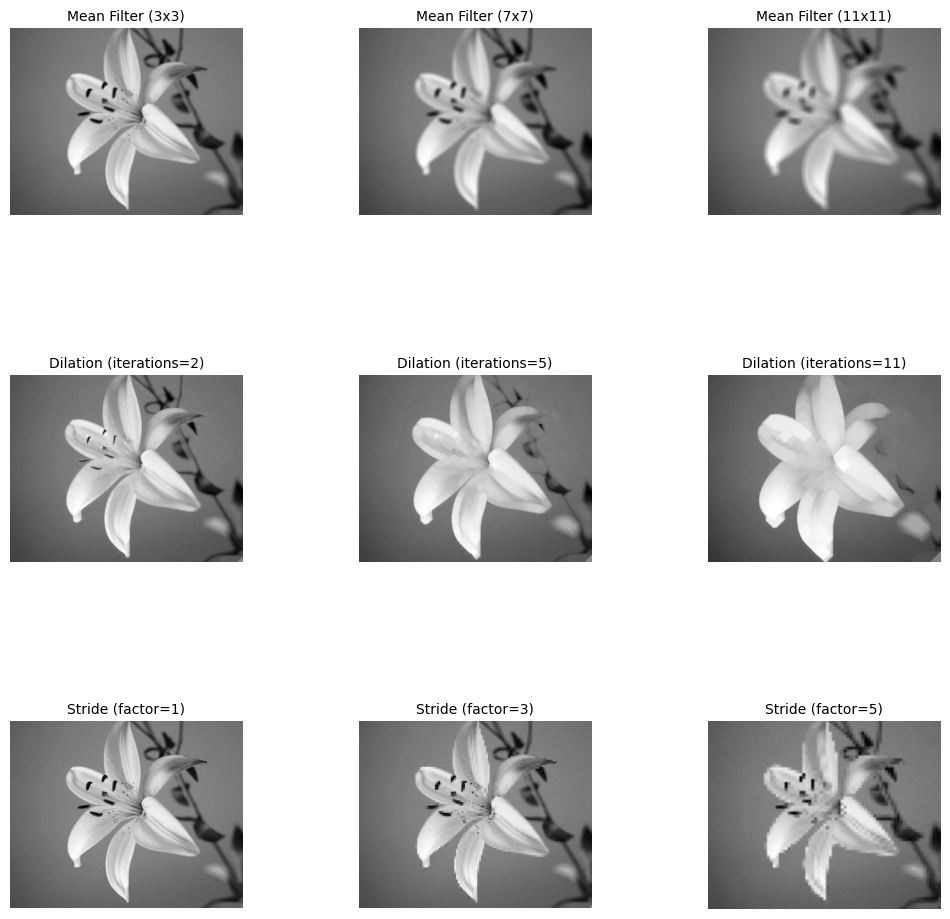

In [ ]:
image_gray = cv2.imread('/content/BTI/figs/flower.png', cv2.IMREAD_GRAYSCALE)

filter_sizes = [3, 7, 11]
dilations = [2, 5, 11]
strides = [1, 3, 5]

filter_analysis(image_gray, create_mean_filter, filter_sizes, dilations, strides, ncols=3, spacing=0.5)  # Adjusted spacing value

# **Gaussian_mask**

In [ ]:
def gkernel(l=3, sig=2):

    ax = np.linspace(-(l - 1) / 2., (l - 1) / 2., l)
    xx, yy = np.meshgrid(ax, ax)
    kernel = np.exp(-0.5 * (np.square(xx) + np.square(yy)) / np.square(sig))

    return kernel / np.sum(kernel)

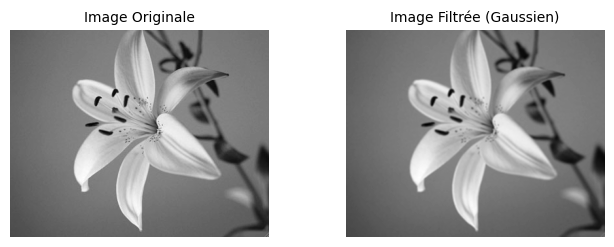

In [ ]:
gaussian_kernel = gkernel()
gaussian_filtered_image = apply_convolution(image_gray, gaussian_kernel)
ncols =1
plot_images([image_gray, gaussian_filtered_image,], ['Image Originale', 'Image Filtrée (Gaussien)'])

# **Image colorée**

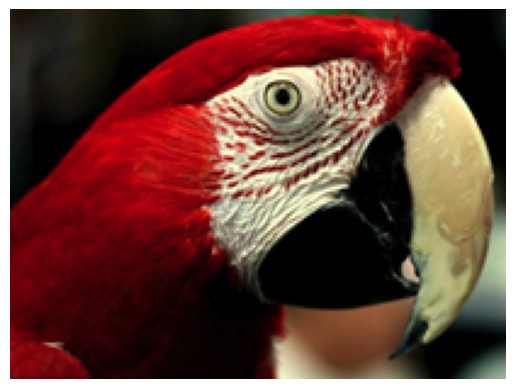

In [ ]:
image_color = cv2.imread('/content/BTI/figs/red_bird.png')
image_color = cv2.cvtColor(image_color, cv2.COLOR_BGR2RGB)
plt.imshow(image_color)
plt.axis('off')
plt.show()

In [ ]:
def apply_convolution_color(image_color, kernel):
    channels = cv2.split(image_color)
    filtered_channels = []

    for channel in channels:
        filtered_channels.append(cv2.filter2D(channel, -1, kernel))

    filtered_image = cv2.merge(filtered_channels)
    return filtered_image


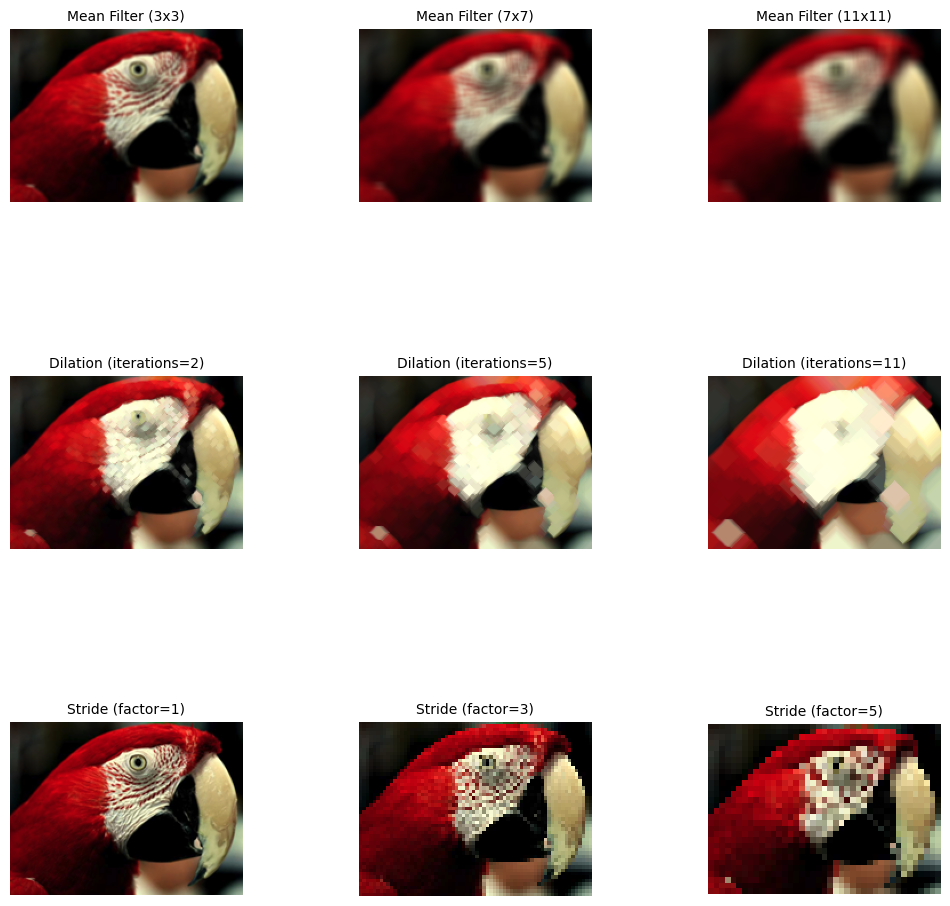

In [ ]:
def filter_analysis_color(image_color, filter_func, filter_sizes, dilations, strides, ncols=3, spacing=0.2):
    num_filters = len(filter_sizes)
    num_dilations = len(dilations)
    num_strides = len(strides)
    num_plots = num_filters + num_dilations + num_strides

    result_images = []
    titles = []

    # Conv Diff Sizes
    for size in filter_sizes:
        kernel = filter_func(size)
        result = apply_convolution_color(image_color, kernel)
        result_images.append(result)
        titles.append(f'Mean Filter ({size}x{size})')

    # Conv diff dilations
    for dilation in dilations:
        kernel = np.array([[0, 1, 0], [1, 1, 1], [0, 1, 0]], dtype=np.uint8)
        result = cv2.dilate(image_color, kernel, iterations=dilation)
        result_images.append(result)
        titles.append(f'Dilation (iterations={dilation})')

    # Conv different stries
    for stride in strides:
        result = cv2.resize(image_color, None, fx=1/stride, fy=1/stride, interpolation=cv2.INTER_LINEAR)
        result_images.append(result)
        titles.append(f'Stride (factor={stride})')

    plot_images(result_images, titles, ncols=ncols, spacing=spacing)


filter_analysis_color(image_color, create_mean_filter, filter_sizes, dilations, strides, ncols=3, spacing=0.5)


## **Gx = I ⊛ Sx et Gy = I ⊛ Sy**

In [ ]:
import my_functions_tp02 as mf

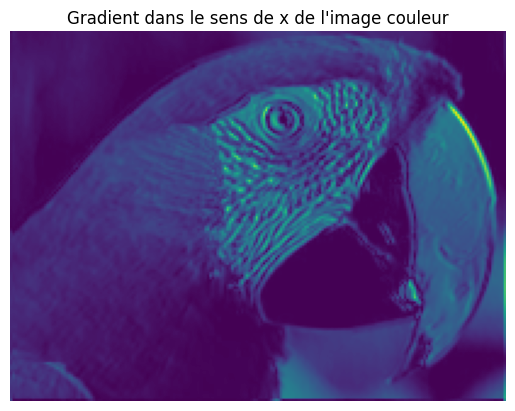

In [ ]:

image_color = cv2.imread('/content/BTI/figs/red_bird.png', cv2.IMREAD_COLOR)
image_color_float = image_color.astype(np.float32) / 255.0

# Séparer les canaux de couleur de l'image
blue_channel, green_channel, red_channel = cv2.split(image_color_float)

# Calculer le gradient dans le sens de x pour chaque canal de couleur
gradient_x_red = mf.get_Gx(red_channel)
gradient_x_green = mf.get_Gx(green_channel)
gradient_x_blue = mf.get_Gx(blue_channel)

# Combinez les gradients de chaque canal de couleur pour former l'image du gradient
gradient_x_combined = np.sqrt(gradient_x_red ** 2 + gradient_x_green ** 2 + gradient_x_blue ** 2)

# Afficher l'image du gradient dans le sens de x
plt.imshow(gradient_x_combined)
plt.title('Gradient dans le sens de x de l\'image couleur')
plt.axis('off')
plt.show()